# Stock price prediction

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

In [4]:
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [5]:
# Load the data
data = pd.read_csv('Amazon.csv')
data = data.sort_values('Date')  

In [6]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250
...,...,...,...,...,...,...,...
6094,2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078
6095,2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029
6096,2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912
6097,2022-03-24,3282.370117,3201.000000,3274.989990,3272.989990,2834900.0,3272.989990


In [7]:
data = data[['Close']]

In [8]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [9]:
X_train, y_train = [], []

In [10]:
for i in range(60, len(data_scaled)):
    X_train.append(data_scaled[i-60:i, 0])
    y_train.append(data_scaled[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
189/189 [==============================] - 17s 57ms/step - loss: 0.0025
Epoch 2/25
189/189 [==============================] - 12s 61ms/step - loss: 2.6837e-04
Epoch 3/25
189/189 [==============================] - 12s 65ms/step - loss: 2.3157e-04
Epoch 4/25
189/189 [==============================] - 12s 65ms/step - loss: 2.3913e-04
Epoch 5/25
189/189 [==============================] - 12s 62ms/step - loss: 2.6687e-04
Epoch 6/25
189/189 [==============================] - 13s 68ms/step - loss: 2.2836e-04
Epoch 7/25
189/189 [==============================] - 12s 65ms/step - loss: 2.1522e-04
Epoch 8/25
189/189 [==============================] - 16s 86ms/step - loss: 1.8600e-04
Epoch 9/25
189/189 [==============================] - 18s 96ms/step - loss: 1.5627e-04
Epoch 10/25
189/189 [==============================] - 26s 140ms/step - loss: 1.7955e-04
Epoch 11/25
189/189 [==============================] - 25s 131ms/step - loss: 1.8423e-04
Epoch 12/25
189/189 [======================

In [15]:
# Model testing
test_data = pd.read_csv('Amazon.csv')  # Load your test dataset
test_data = test_data[['Close']]
scaled_test_data = scaler.transform(test_data)

In [16]:
X_test = []

for i in range(60, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

189/189 [==============================] - 5s 22ms/step


##  Visualize the results

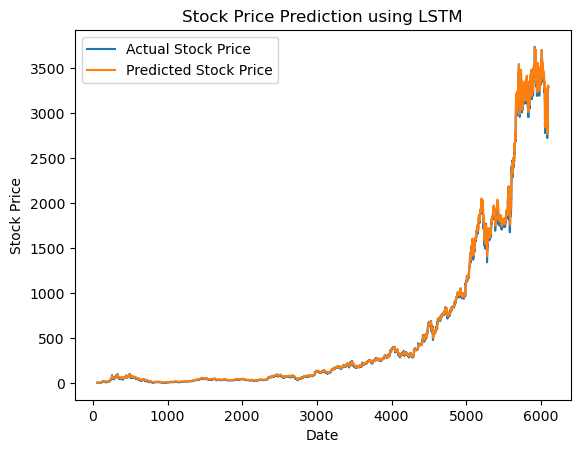

In [18]:
# Visualize the results
plt.plot(test_data.index[60:], test_data['Close'][60:], label='Actual Stock Price')
plt.plot(test_data.index[60:], predicted_stock_price, label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()